Questions:
1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

In [1]:
import pandas as pd
import statsmodels.api as sm

# Provided list of OECD countries
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

# Load the DataFrame
hw_data = pd.read_excel("EFWAndRGDP.xlsx")

# Filter DataFrame to include only OECD countries
oecd_data = hw_data[hw_data["Countries"].isin(oecd_countries)]

# Sort the DataFrame based on ISO_Code_3
sorted_data = oecd_data.sort_values(by="ISO_Code_3")

print(sorted_data)

     ISO_Code_3  Year ISO_Code_2      World Bank Region  \
135         AUS  1970         AU    East Asia & Pacific   
162         AUT  1970         AT  Europe & Central Asia   
243         BEL  1970         BE  Europe & Central Asia   
702         CAN  1970         CA          North America   
729         CHE  1970         CH  Europe & Central Asia   
...         ...   ...        ...                    ...   
4288        NaN  2016         US          North America   
4289        NaN  2017         US          North America   
4290        NaN  2018         US          North America   
4291        NaN  2019         US          North America   
4292        NaN  2020         US          North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
135                                                 NaN                                                                                     
162      

In [2]:
import pandas as pd
import statsmodels.api as sm

# Provided list of OECD countries
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

# Load the DataFrame
hw_data = pd.read_excel("EFWAndRGDP.xlsx")

# Filter DataFrame to include only OECD countries
oecd_data = hw_data[hw_data["Countries"].isin(oecd_countries)]

# Sort the DataFrame based on ISO_Code_3
sorted_data = oecd_data.sort_values(by="ISO_Code_3")

# Define regression variables
x_vars = ['Size of Government', 'Legal System and Property Rights', 'Sound Money', 'Freedom to Trade Internationally', 'Regulation']
y_var = ['RGDP Per Capita']

# Drop rows with missing values
sorted_data.dropna(subset=x_vars + y_var, inplace=True)

# Prepare X and Y variables for regression
X = sorted_data[x_vars]
X["Constant"] = 1
Y = sorted_data[y_var]

# Fit OLS regression model
results = sm.OLS(Y, X).fit()

# Print regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     224.0
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          3.60e-153
Time:                        18:57:24   Log-Likelihood:                -9174.3
No. Observations:                 869   AIC:                         1.836e+04
Df Residuals:                     863   BIC:                         1.839e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of 

/tmp/ipykernel_2975/3674085082.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.



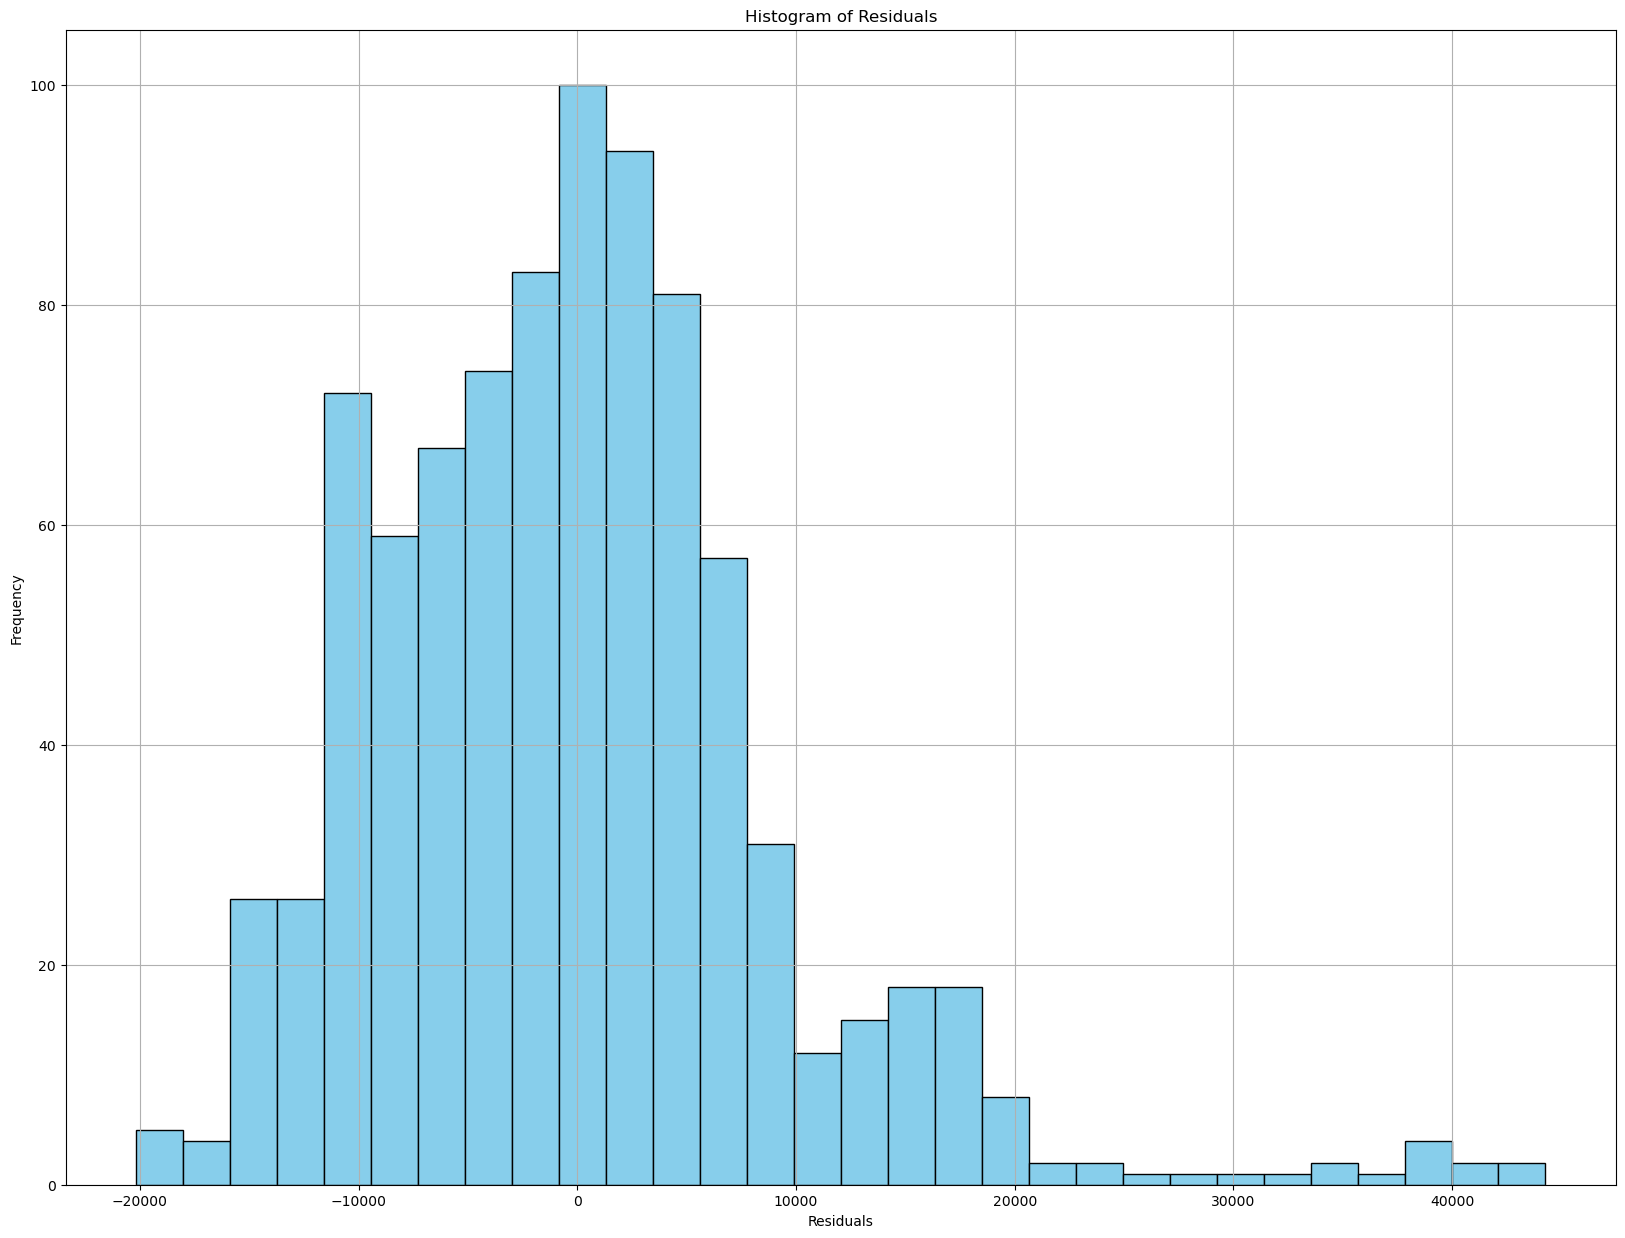

In [3]:
import matplotlib.pyplot as plt

# Plot the residuals in a histogram
plt.figure(figsize=(20, 15))
plt.hist(results.resid, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The residuals in this regression may differ from the initial analysis due to a distinct dataset and filtering for OECD nations. Variations in data attributes and variable relationships are possible. Differences in variables between analyses can impact residual distribution. Assumptions of the model may not apply to this dataset, affecting residual distribution. Sample size and outliers can shape residual distribution. Data transformations like logarithmic changes can influence residuals. Comparative analysis of residual histograms provides insights on data disparities and regression model effectiveness.

In [ ]:
3. Plot separate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

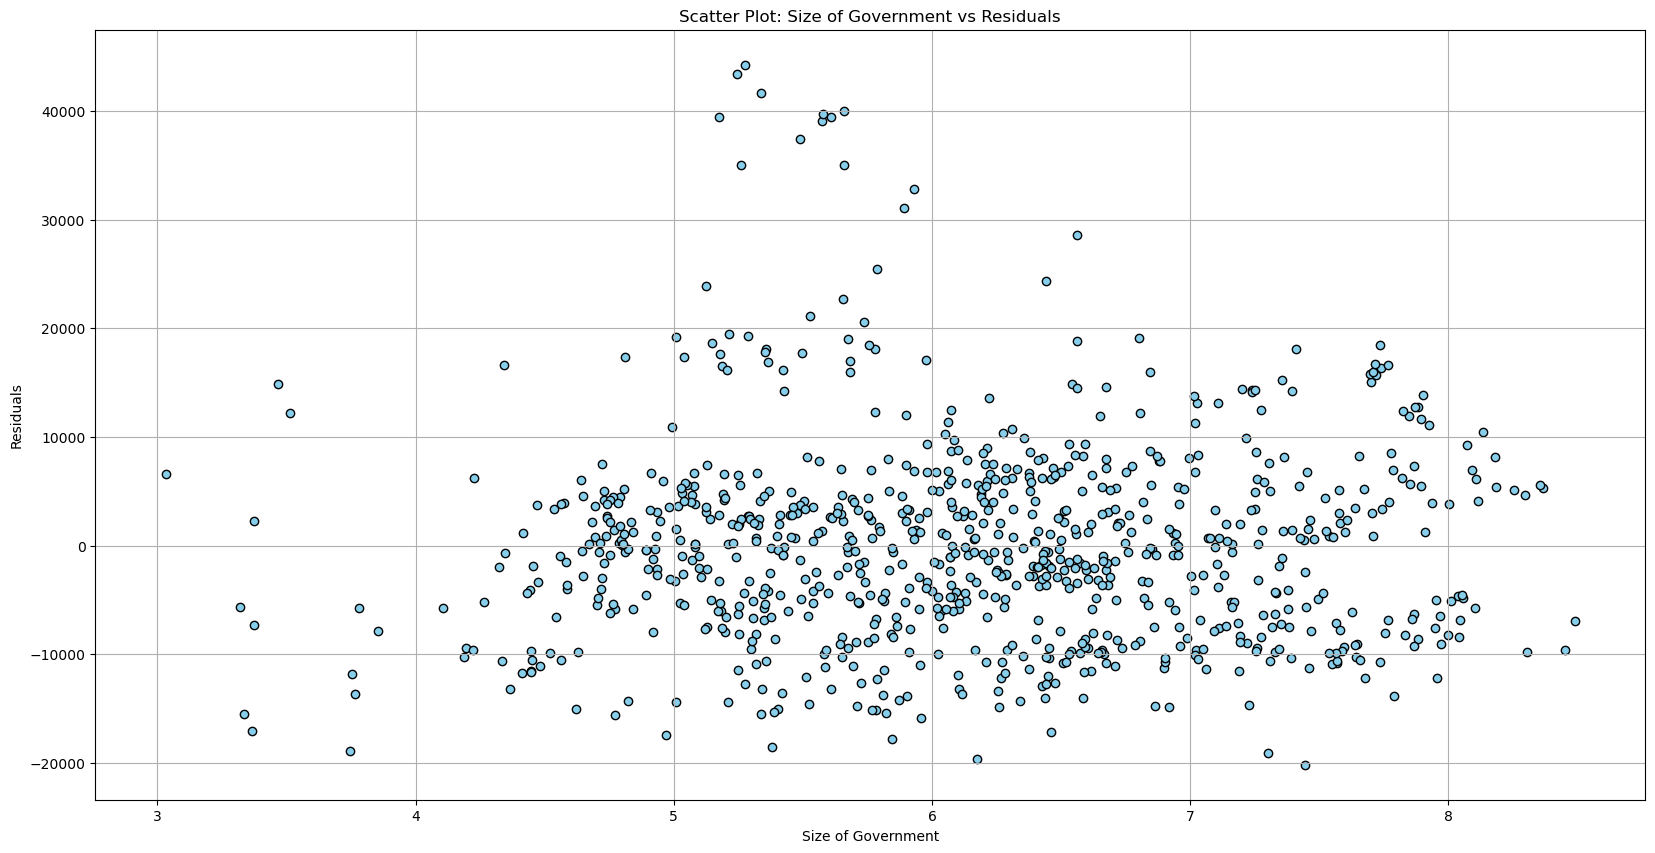

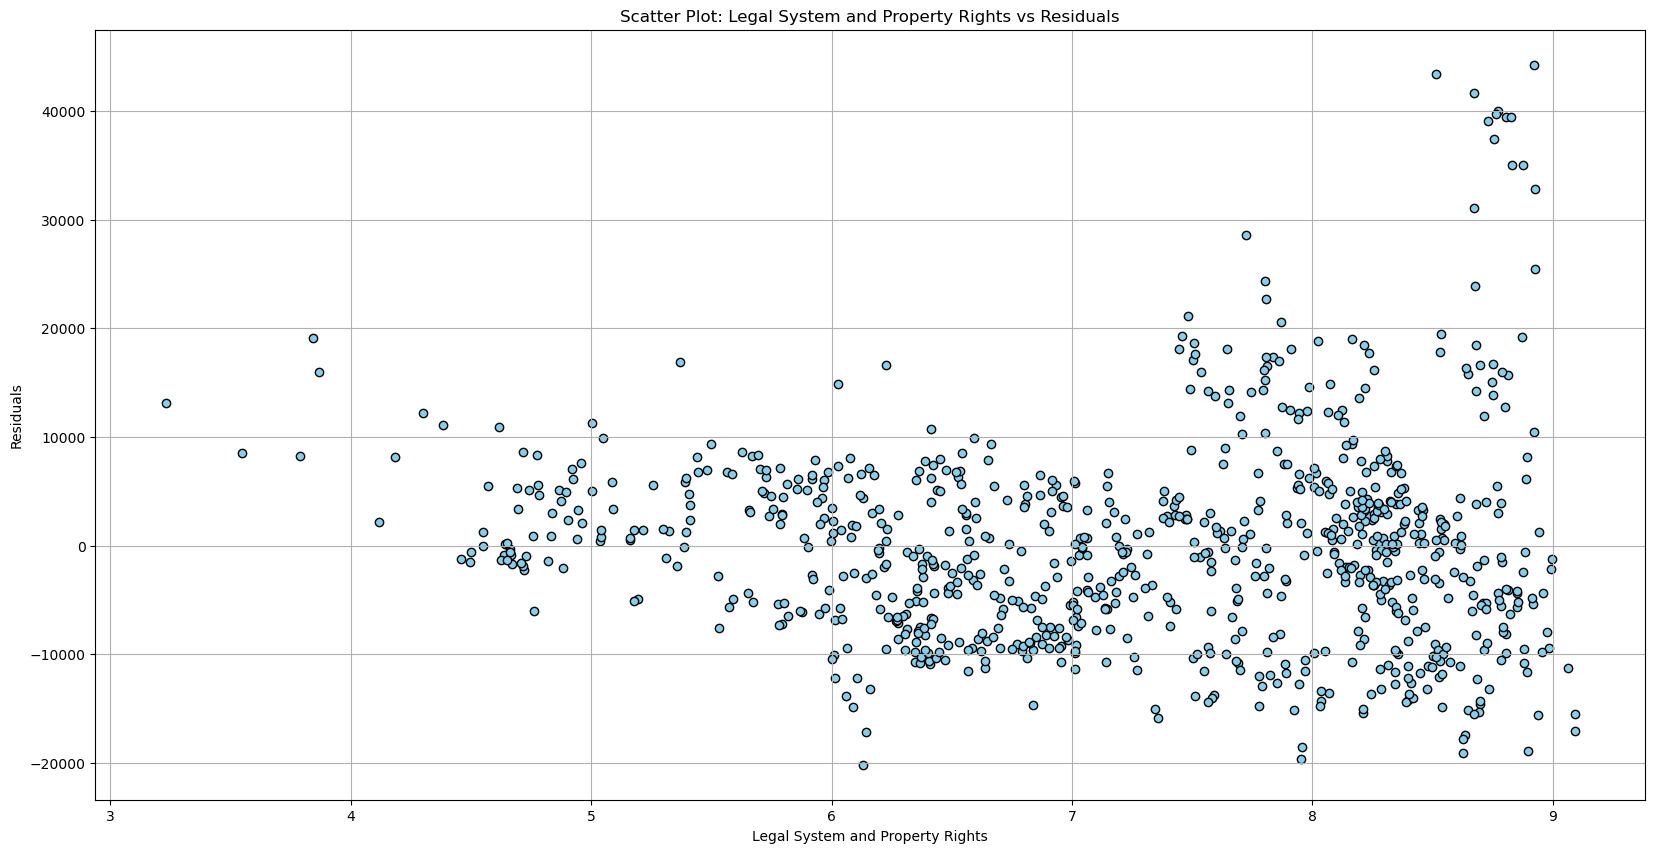

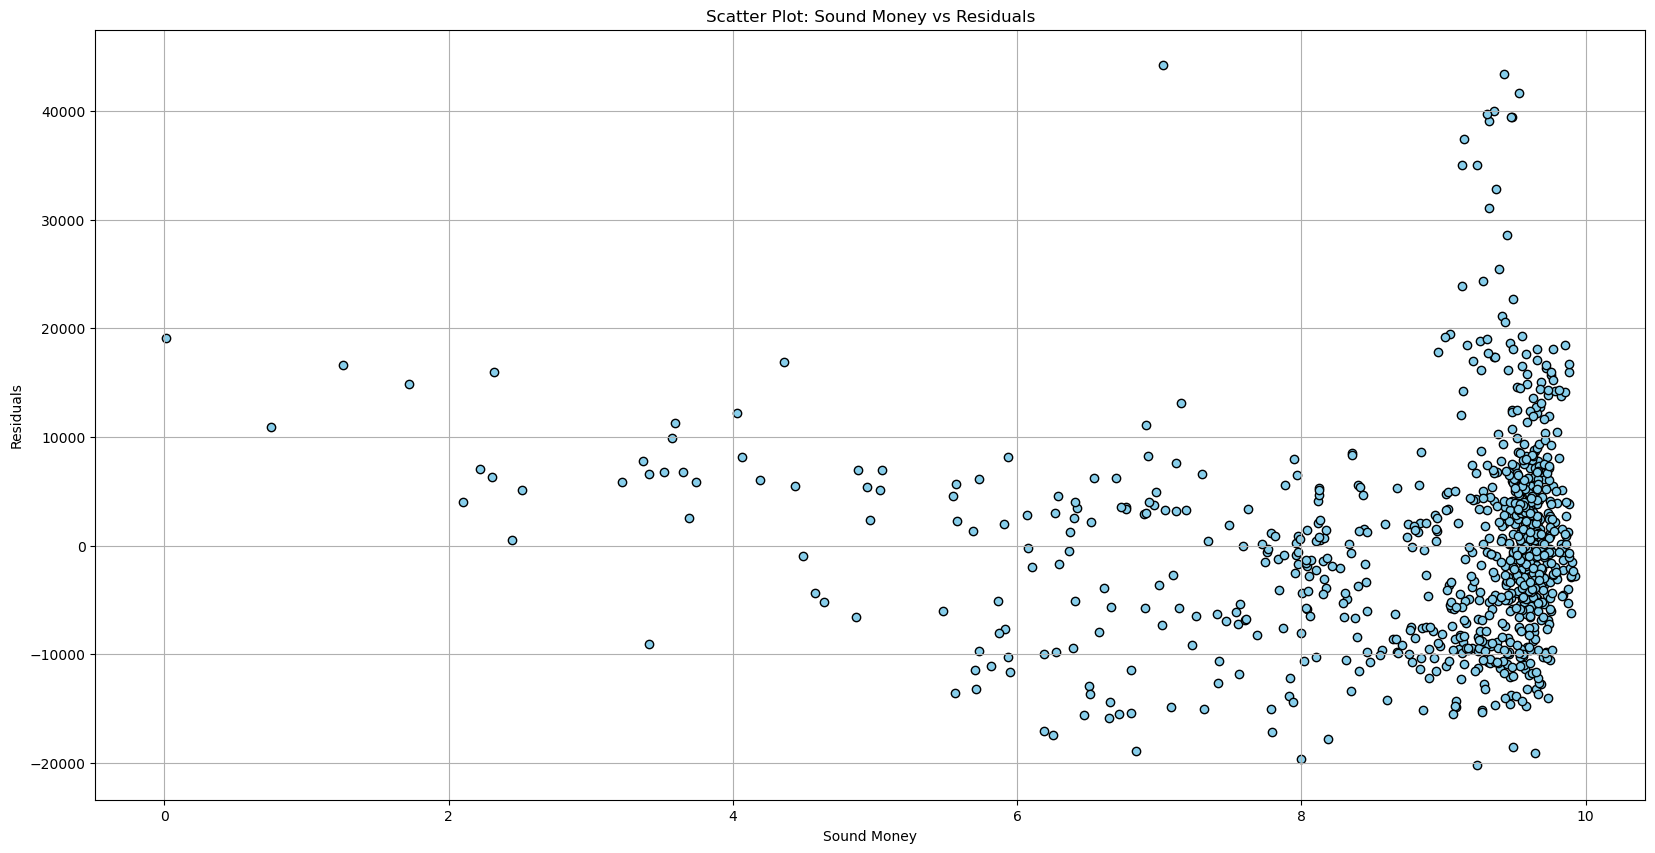

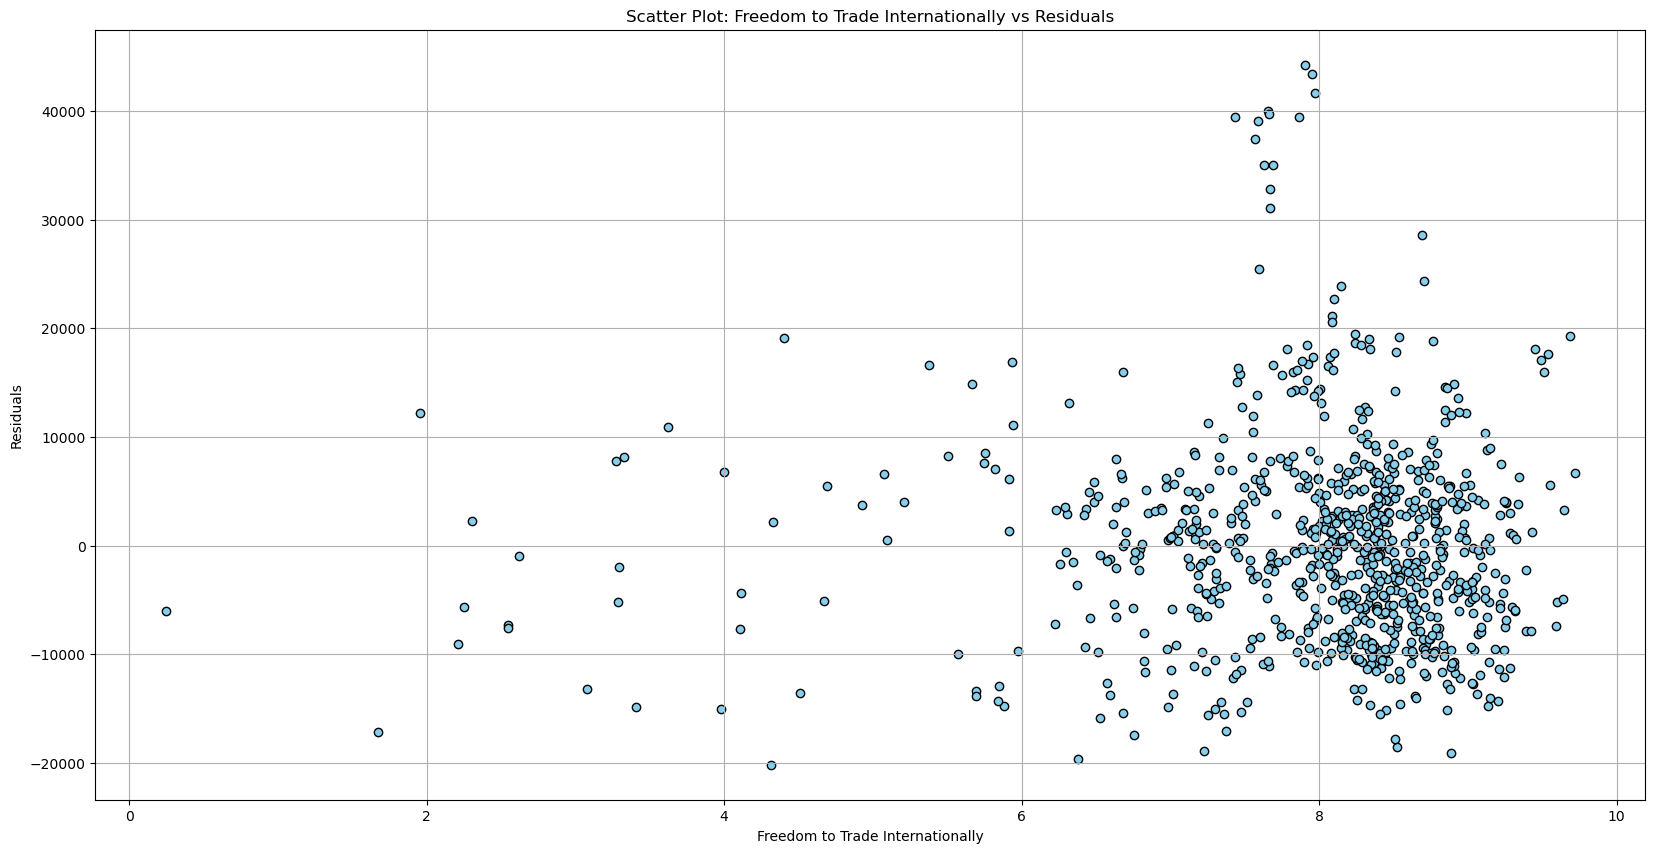

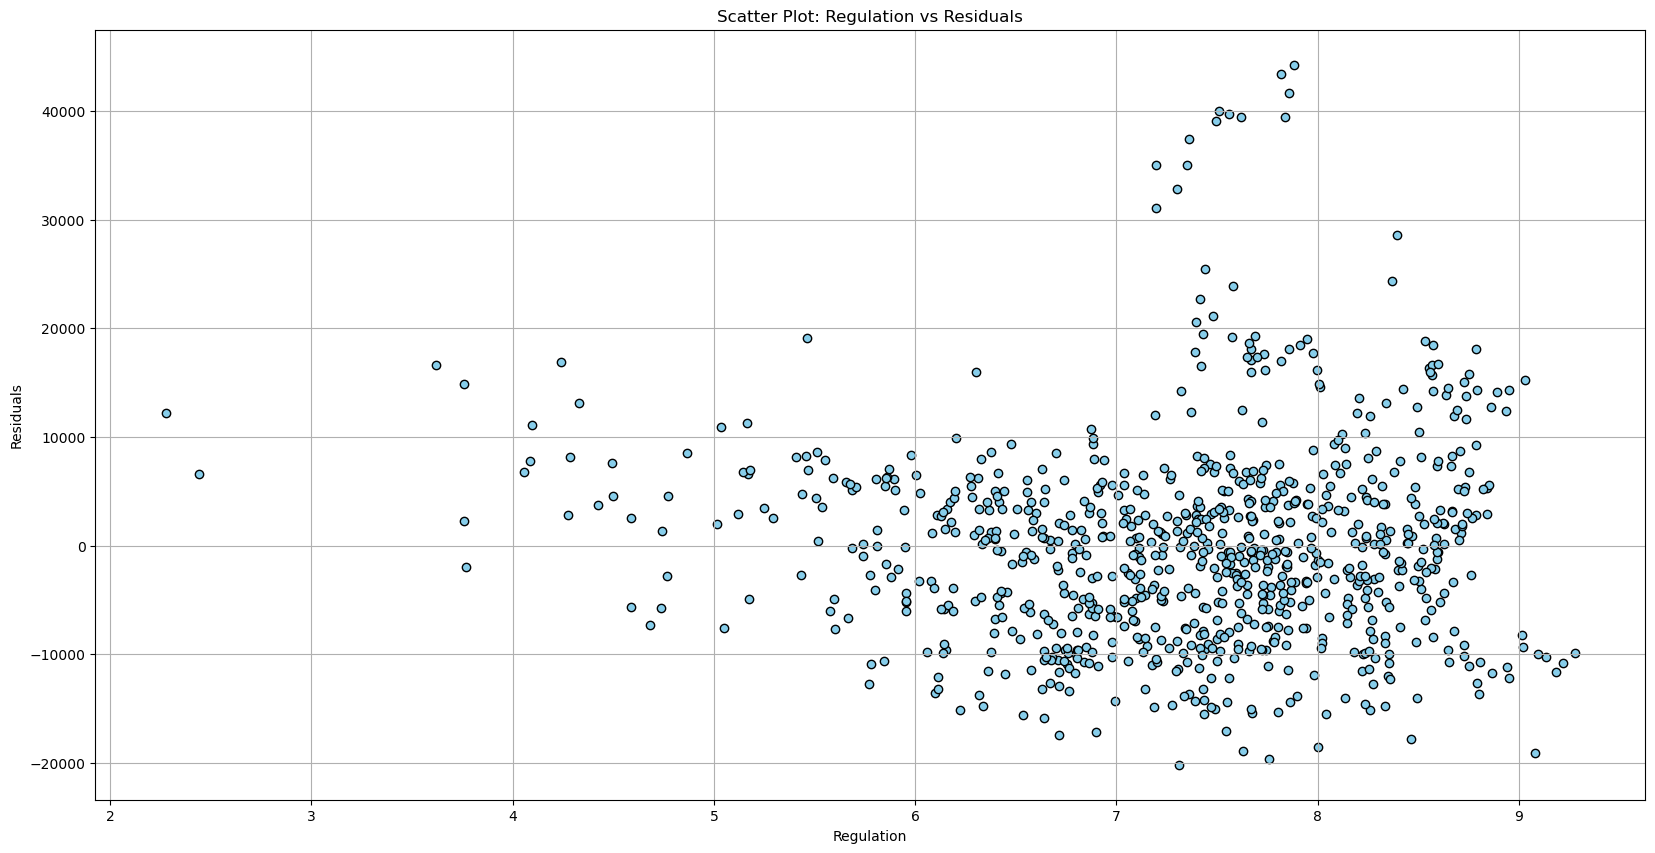

In [5]:
# Plot separate scatter plots for each variable against the predictor
for var in x_vars:
    plt.figure(figsize=(20, 10))
    plt.scatter(sorted_data[var], results.resid, color='skyblue', edgecolor='black')
    plt.title(f'Scatter Plot: {var} vs Residuals')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()


Assumption checking is crucial to evaluate bias in residuals regarding individual variables for linearity assessment. Patterns or biases in residuals suggest inadequate relationship capture between predictor and response. Identification of bias in residuals indicates model specification appropriateness. Bias presence may signify omitted or incorrectly modeled variables. Bias in residuals shows model's failure to capture variable impact on response, leading to biased estimates and interpretations. Biases in residuals affect predictive performance, leading to inaccurate predictions and difficulty in generalization. Examination of bias in residuals helps detect misspecifications, improving model reliability and interpretability.ability.

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

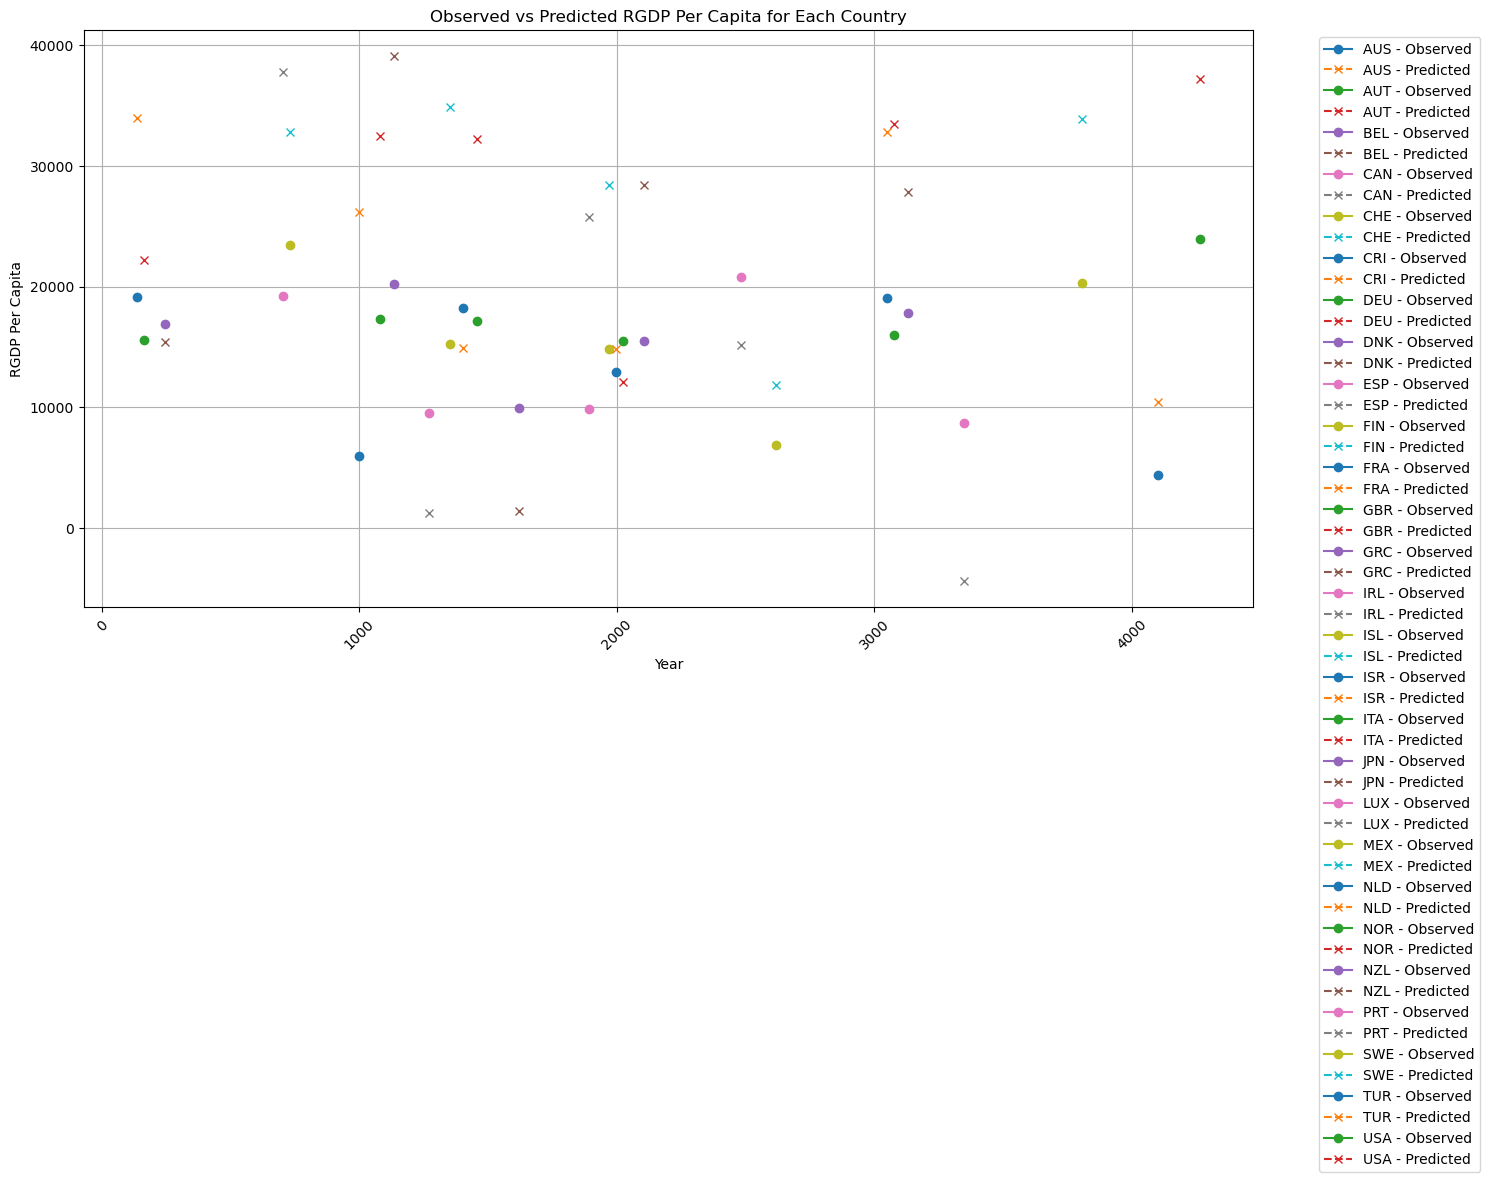

In [7]:
# Fit OLS regression model
results = sm.OLS(Y, X).fit()

# Predict RGDP Per Capita
sorted_data['RGDP Per Capita Predictor'] = results.predict()

# Plot observed and predicted values for each country
plt.figure(figsize=(15, 10))

# Group data by ISO_Code_3 and iterate over each group (country)
for country, group in sorted_data.groupby('ISO_Code_3'):
    plt.plot(group.index.get_level_values(0), group['RGDP Per Capita'], label=f'{country} - Observed', marker='o')
    plt.plot(group.index.get_level_values(0), group['RGDP Per Capita Predictor'], label=f'{country} - Predicted', linestyle='--', marker='x')

plt.title('Observed vs Predicted RGDP Per Capita for Each Country')
plt.xlabel('Year')
plt.ylabel('RGDP Per Capita')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
print(sorted_data.columns)


Index(['ISO_Code_3', 'Year', 'ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Countries', 'Summary', 'Size of Government',
       'Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation',
       'Standard Deviation of the 5 EFW Areas', 'RGDP Per Capita',
       'RGDP Per Capita Predictor'],
      dtype='object')


5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

In [9]:

# Provided list of OECD countries
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

# Load the DataFrame
hw_data = pd.read_excel("EFWAndRGDP.xlsx")

# Filter DataFrame to include only OECD countries
oecd_data = hw_data[hw_data["Countries"].isin(oecd_countries)]

# Sort the DataFrame based on ISO_Code_3
sorted_data = oecd_data.sort_values(by="ISO_Code_3")

# Define regression variables
x_vars = ['Size of Government', 'Legal System and Property Rights', 'Sound Money', 'Freedom to Trade Internationally', 'Regulation']
y_var = ['RGDP Per Capita']

# Drop rows with missing values
sorted_data.dropna(subset=x_vars + y_var, inplace=True)

# Prepare X and Y variables for regression
X = sorted_data[x_vars]
X["Constant"] = 1
Y = sorted_data[y_var]

# Group data by country and select data for two consecutive years for each group
grouped_data_2_years = sorted_data.groupby("ISO_Code_3").apply(lambda x: x.head(2))

# Prepare X and Y variables for regression using 2 years data
X_2_years = grouped_data_2_years[x_vars]
X_2_years["Constant"] = 1
Y_2_years = grouped_data_2_years[y_var]

# Fit OLS regression model for 2 years data
results_2_years = sm.OLS(Y_2_years, X_2_years).fit()

# Print regression summary for 2 years data
print(results_2_years.summary())


                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5.830
Date:                Thu, 18 Apr 2024   Prob (F-statistic):            0.00158
Time:                        18:57:29   Log-Likelihood:                -257.17
No. Observations:                  27   AIC:                             526.3
Df Residuals:                      21   BIC:                             534.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of 

/tmp/ipykernel_2975/345431884.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
/tmp/ipykernel_2975/345431884.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2_years["Constant"] = 1


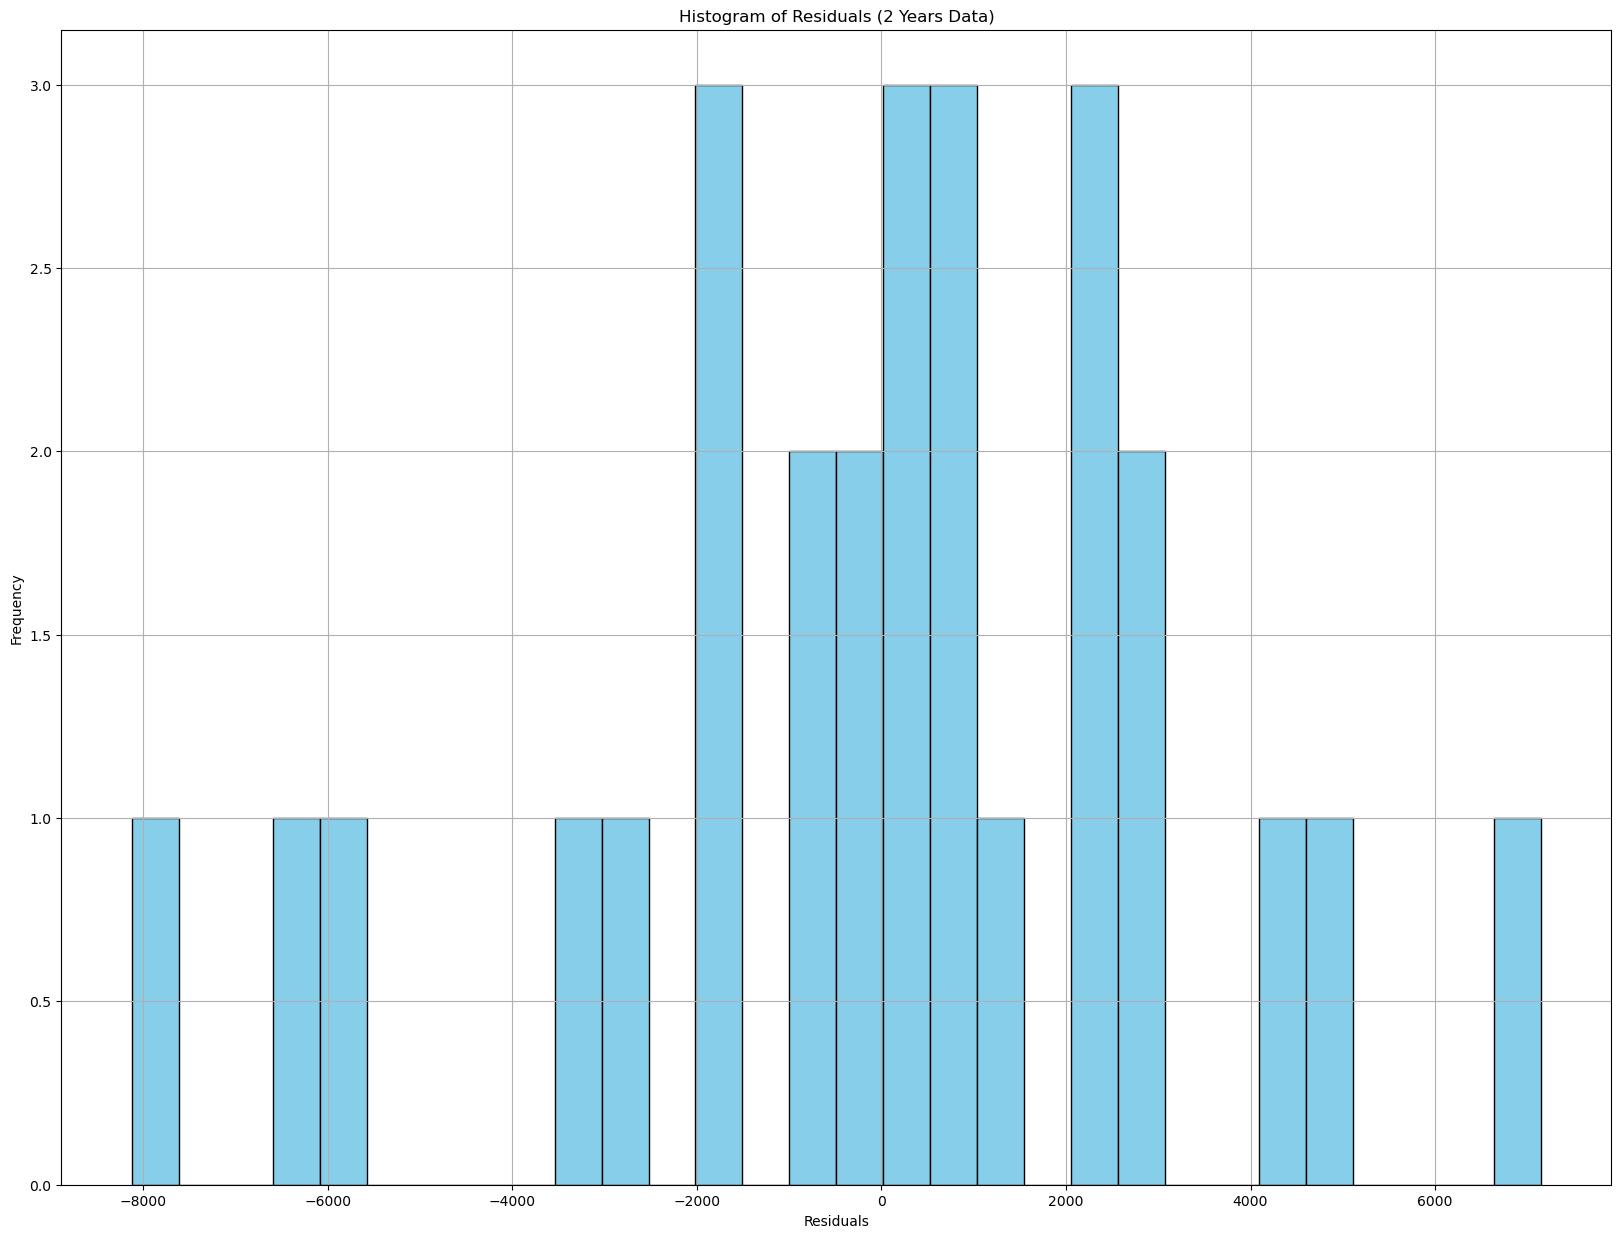

In [10]:

# Plot the residuals in a histogram
plt.figure(figsize=(20, 15))
plt.hist(results_2_years.resid, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals (2 Years Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The distribution of residuals in the second regression differs from the first due to factors like sample size, model specification, data quality, assumptions, time period, and model complexity. These factors influence the shape of residuals and the overall analysis of the regression model.

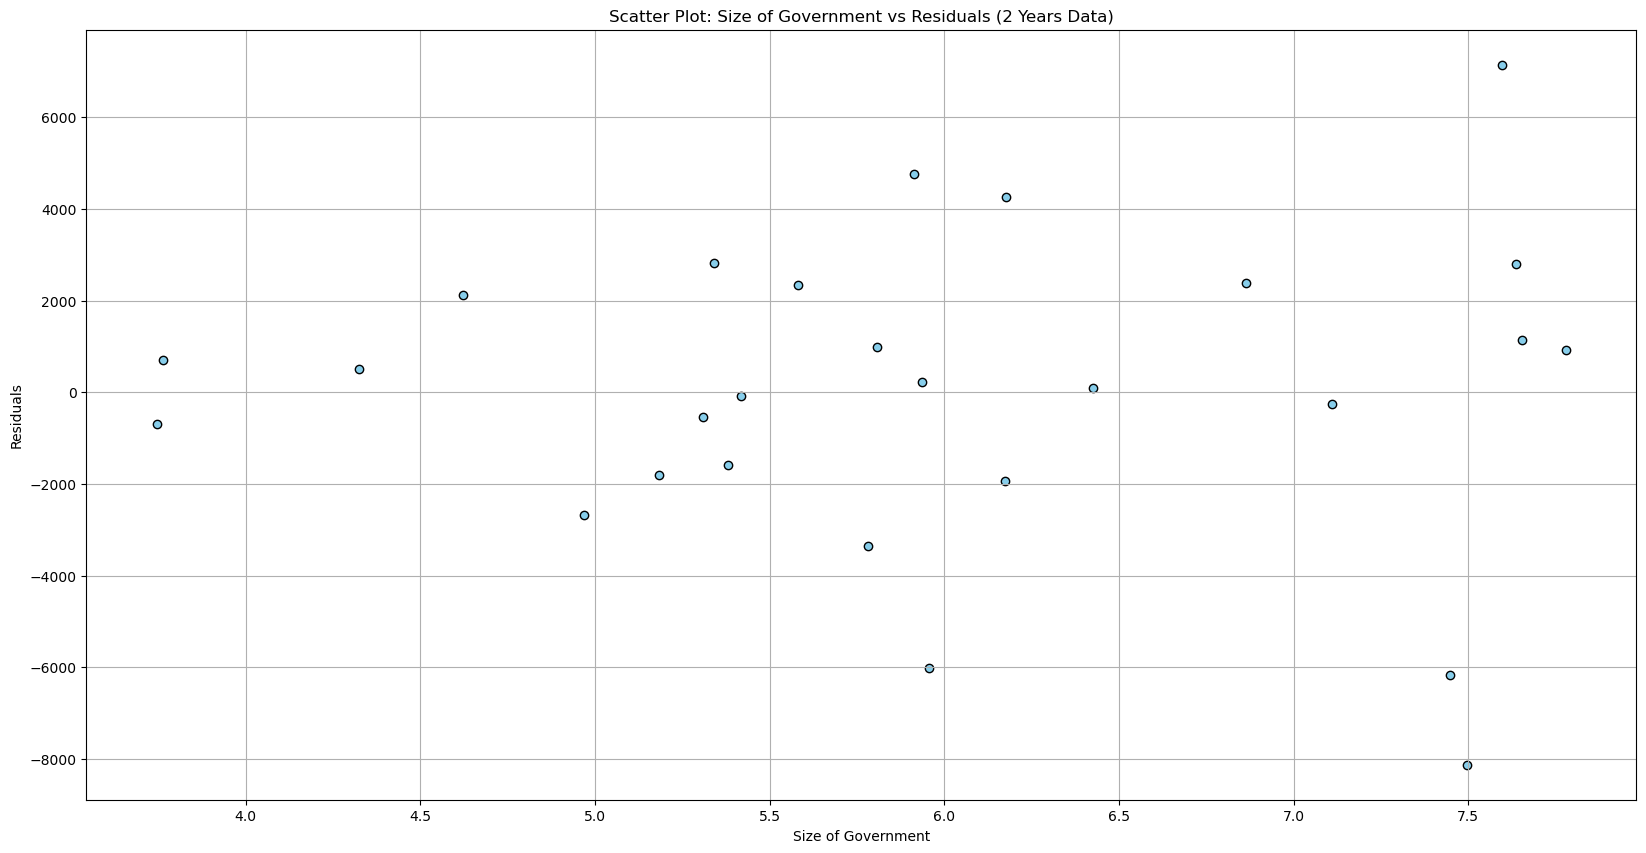

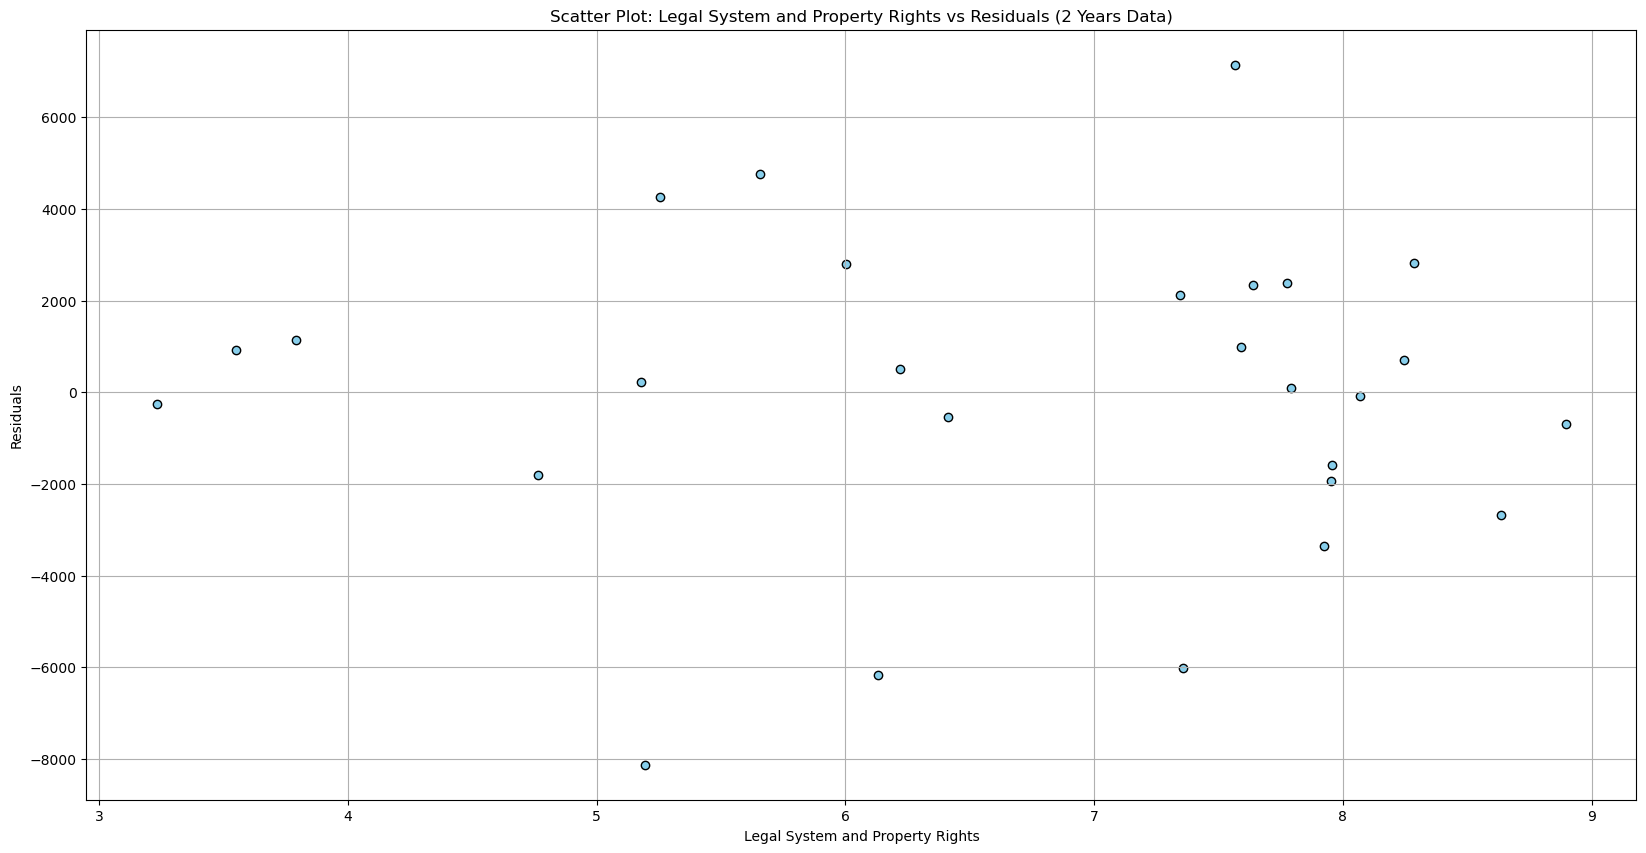

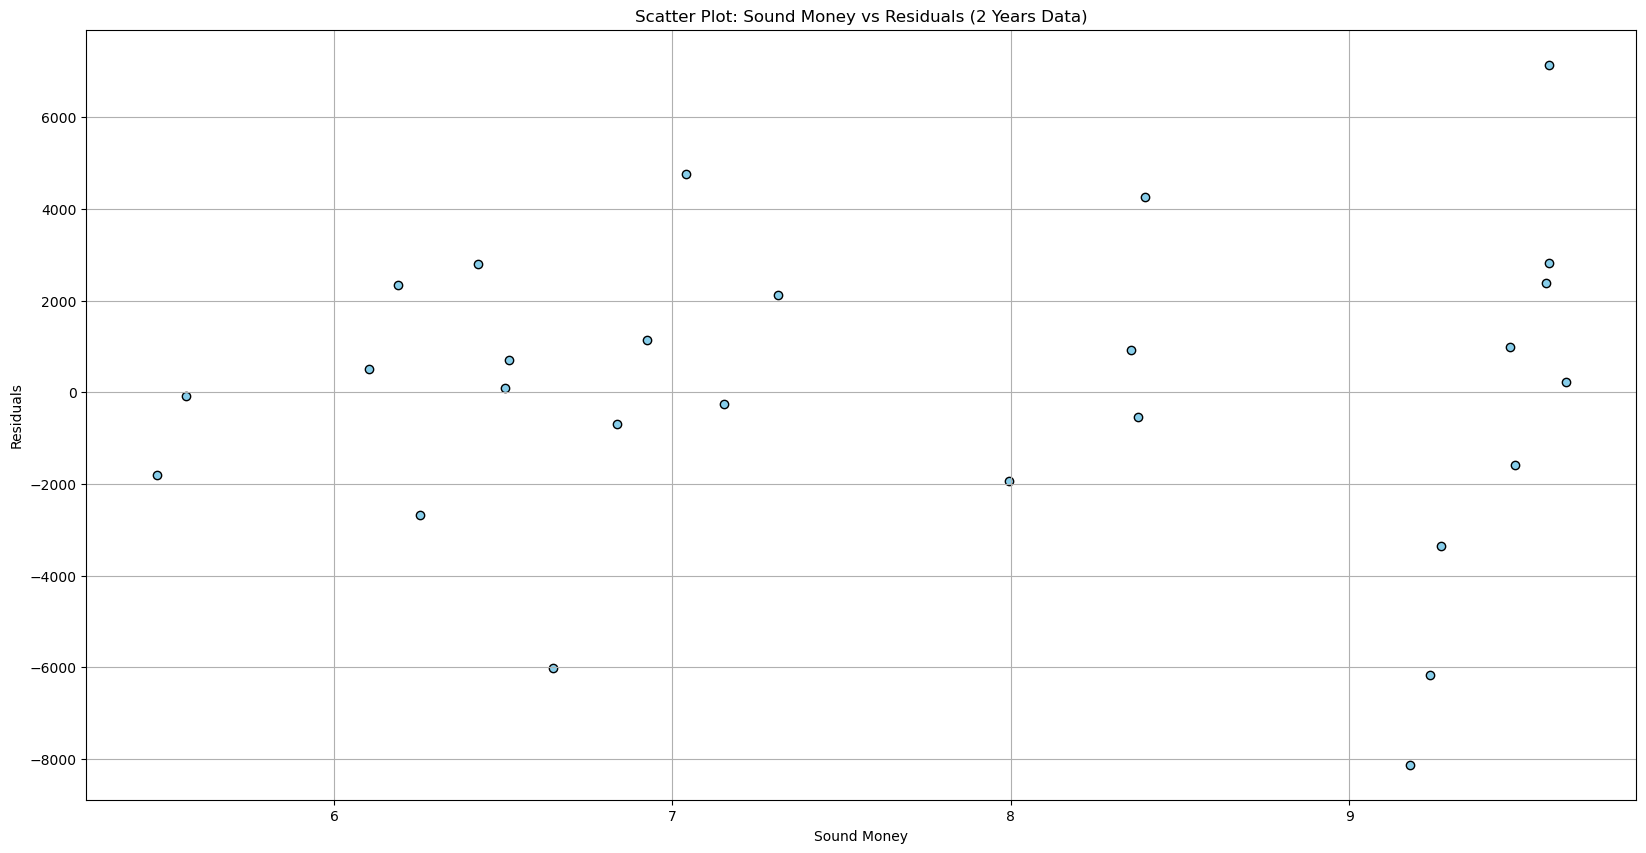

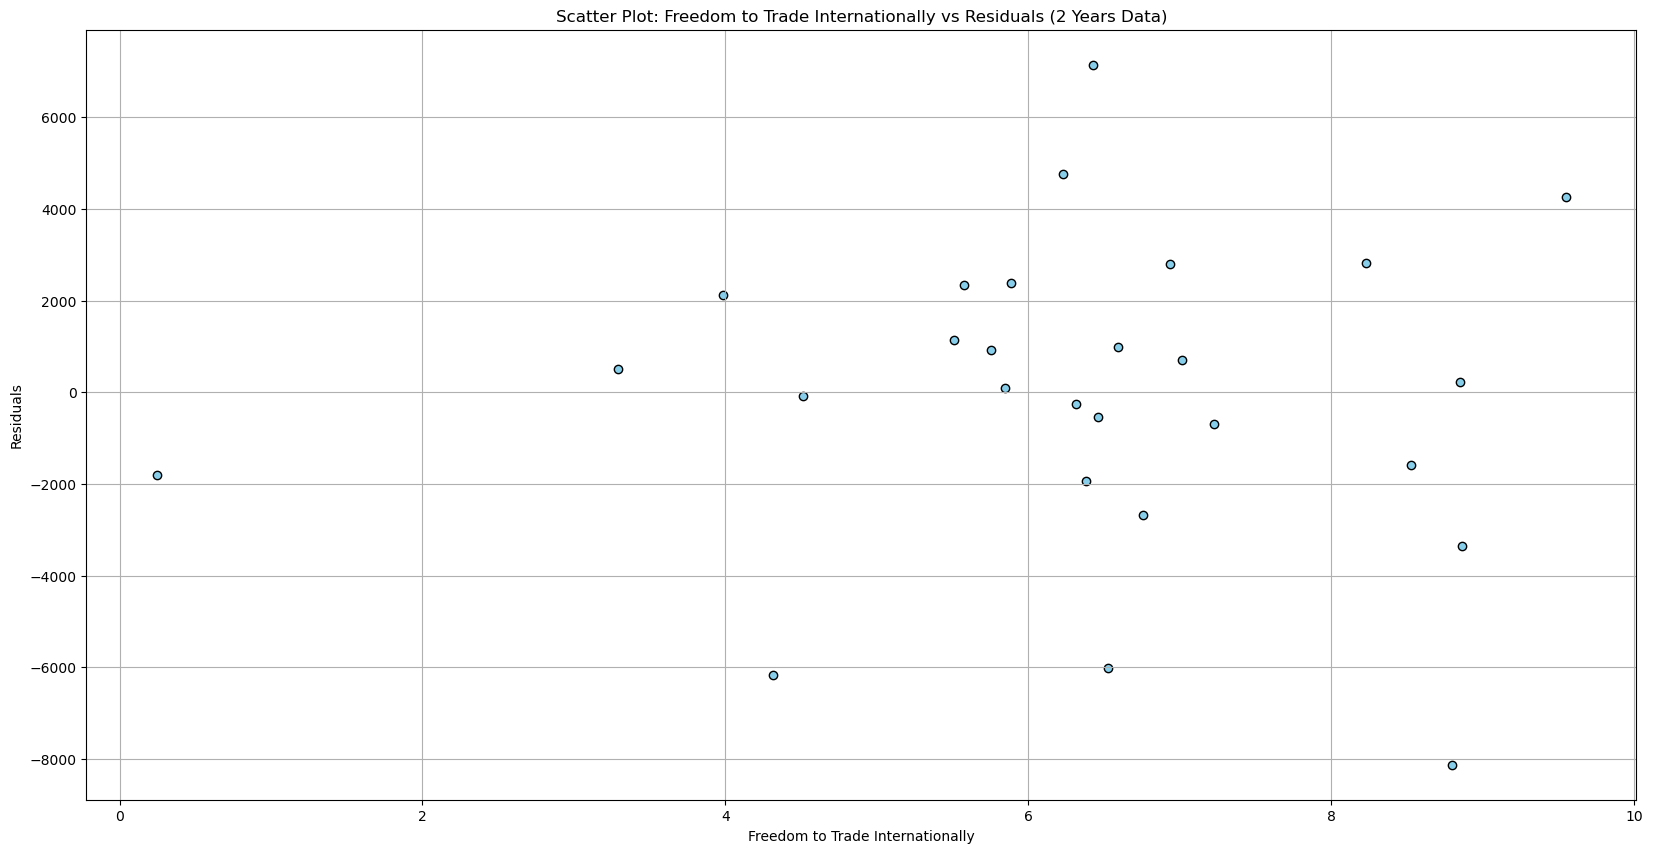

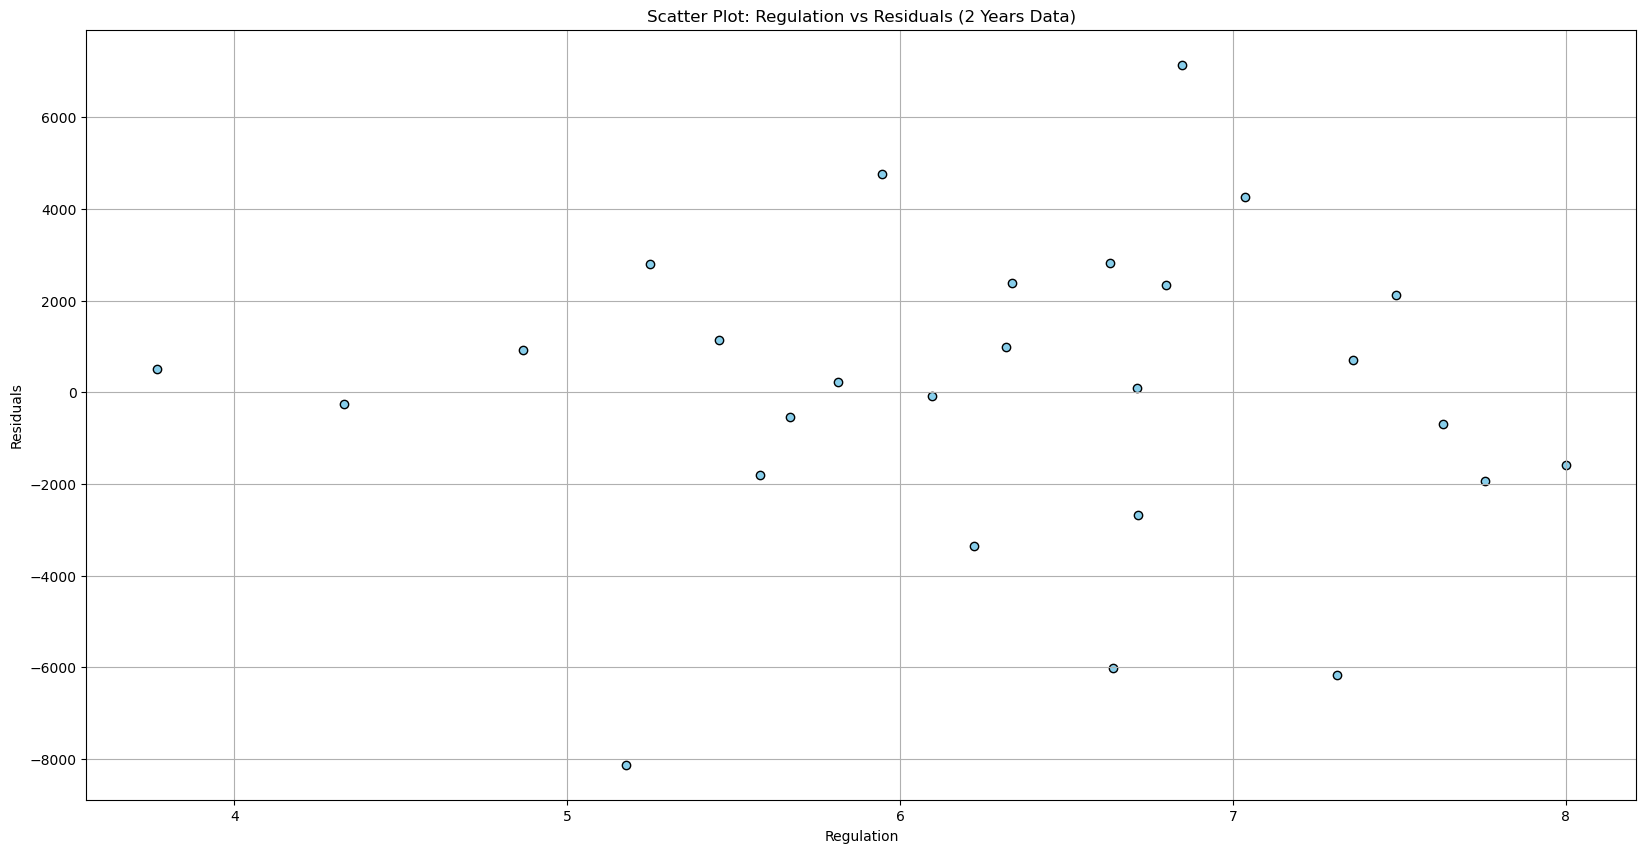

In [12]:

# Plot separate scatter plots for each variable against the predictor
for var in x_vars:
    plt.figure(figsize=(20, 10))
    plt.scatter(grouped_data_2_years[var], results_2_years.resid, color='skyblue', edgecolor='black')
    plt.title(f'Scatter Plot: {var} vs Residuals (2 Years Data)')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()


Observing bias in residuals indicates a systematic trend in residuals with respect to each variable, suggesting potential model misspecification. Bias in residuals can be important due to model misspecification, violation of assumptions, inaccurate predictions, and impact on result interpretation. Addressing bias in residuals is crucial for ensuring the validity and reliability of regression analysis results. Techniques like including additional variables or using more flexible modeling approaches can help mitigate bias and enhance regression model performance.

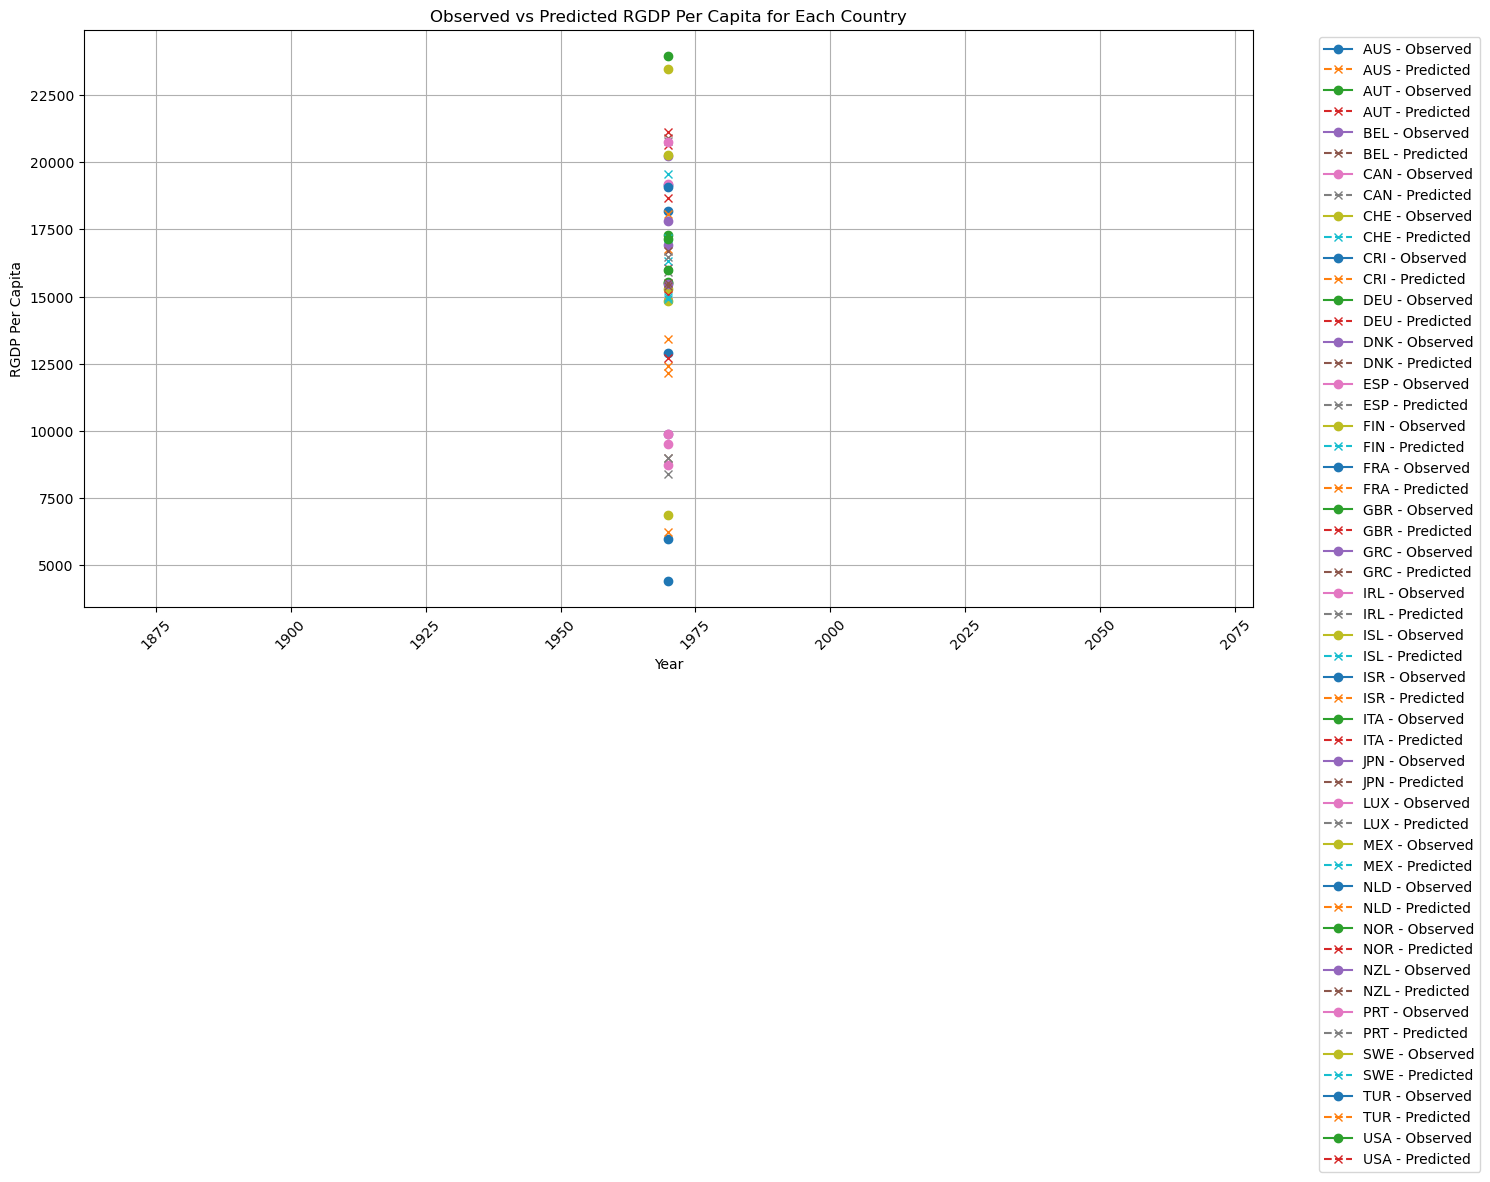

In [14]:
import matplotlib.pyplot as plt

# Predict RGDP Per Capita for the grouped data using the fitted regression model
grouped_data_2_years['RGDP Per Capita Predictor'] = results_2_years.predict(X_2_years)

# Plot observed and predicted values for each country
plt.figure(figsize=(15, 10))

# Iterate over each group (country)
for country, group in grouped_data_2_years.groupby(level=0):
    plt.plot(group['Year'], group['RGDP Per Capita'], label=f'{country} - Observed', marker='o')
    plt.plot(group['Year'], group['RGDP Per Capita Predictor'], label=f'{country} - Predicted', linestyle='--', marker='x')

plt.title('Observed vs Predicted RGDP Per Capita for Each Country')
plt.xlabel('Year')
plt.ylabel('RGDP Per Capita')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()